In [2]:
import pandas as pd, seaborn as sns
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='embark_town', ylabel='survived'>

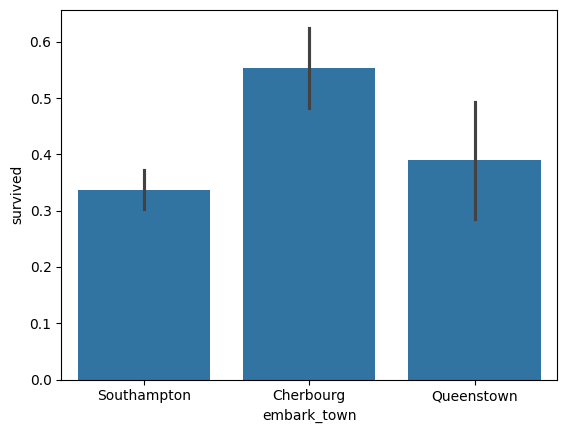

In [20]:
sns.barplot(data=df,x="embark_town",y="survived")

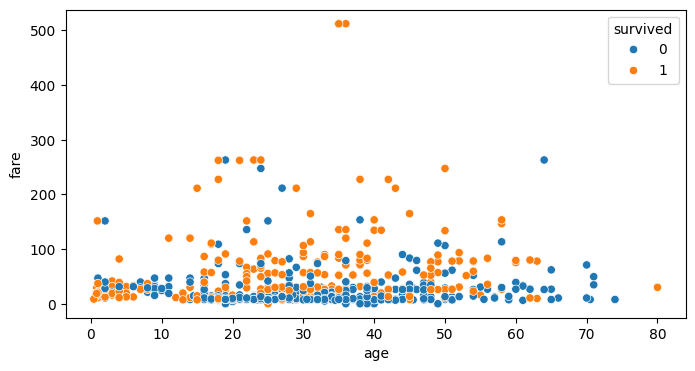

In [5]:
# visualize suvival based on age and fare
from matplotlib import pyplot as plt
plt.figure(figsize=(8,4))
sns.scatterplot(data=df,x='age',y='fare',hue='survived')
plt.show()

In [9]:
# Handle missing values
df['age'] = df['age'].fillna(df['age'].median())
# building model with age and fare
x = df[["age","fare"]]
y = df['survived']
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [10]:
# build KNN Model with n_nbds as 3
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# get prediction
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [14]:
# evaluate the model
print("Train Accuracy: ", model.score(x_train,y_train))
print("Test Accuracy: ", model.score(x_test,y_test))

Train Accuracy:  0.7964071856287425
Test Accuracy:  0.6233183856502242


In [15]:
# full classification report
from sklearn.metrics import classification_report
print("____________________________Train Report_______________________________________")
print(classification_report(y_train,y_train_pred))
print("________________________________________________________________________________")
print("____________________________Test Report_______________________________________")
print(classification_report(y_test,y_test_pred))


____________________________Train Report_______________________________________
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       415
           1       0.76      0.68      0.72       253

    accuracy                           0.80       668
   macro avg       0.79      0.77      0.78       668
weighted avg       0.79      0.80      0.79       668

________________________________________________________________________________
____________________________Test Report_______________________________________
              precision    recall  f1-score   support

           0       0.66      0.75      0.71       134
           1       0.54      0.43      0.47        89

    accuracy                           0.62       223
   macro avg       0.60      0.59      0.59       223
weighted avg       0.61      0.62      0.61       223



In [16]:
# Choose the right value of K
train_acc =  [] 
test_acc = []
for n in range(1,41):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train,y_train)
    train_acc.append(model.score(x_train,y_train))
    test_acc.append(model.score(x_test,y_test))

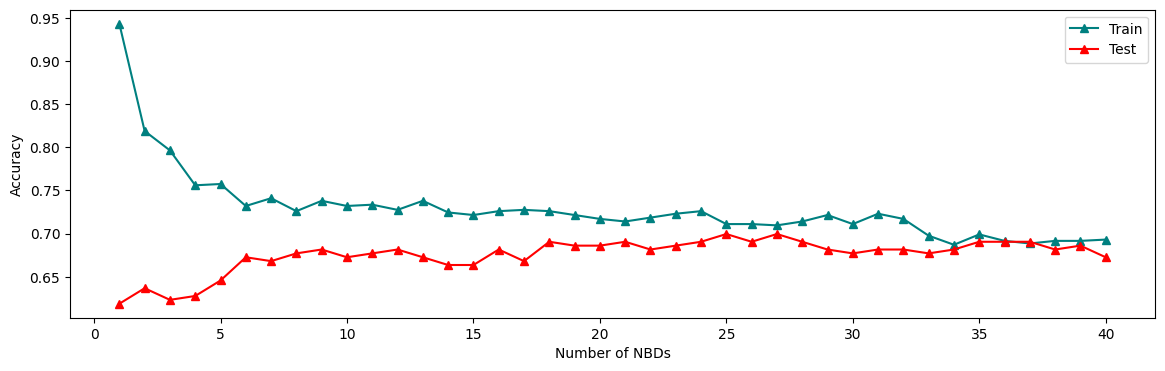

In [17]:
plt.figure(figsize=(14,4))
plt.plot(range(1,41),train_acc,label="Train",marker="^",color='teal')
plt.plot(range(1,41),test_acc,label="Test",marker="^",color='red')
plt.xlabel("Number of NBDs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()